In [154]:
import sys
sys.path.append("../../src")

In [155]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [156]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [157]:
REPORT = True
if REPORT:
    sns.set(font_scale=1.5)

## Load and preprocess data

In [158]:
import data

In [159]:
# set db path hackily
data._get_connection("../../data/participants.db")

raw_df = data.get_trials_df(data.load_raw_results(),
                            ("experiment_id", "materials_id", "item_id", "condition_id"))

response_df = raw_df[(raw_df.experiment_id == "09_comprehension_swarm-full-nonalternating-control") & (raw_df.trial_type == "html-slider-response-with-copout")]

Missing datastring for uid A33LYSCQQU1YDJ:31JLPPHS2VIHTNHTYQX3Y0LM83NO3X. Status was 1.
Missing datastring for uid A1VWP7HOSGKATD:37WLF8U1WQEX0FJWJ038YMGXYHE6KK. Status was 1.
Missing datastring for uid A6QDP0HAGE9W5:3V0Z7YWSIZONYPU7V25CAIA2YANV2I. Status was 1.
Missing datastring for uid A19VDBNACNJNI8:3ZY8KE4ISKR4Q8WSXDVD6085GQIQVU. Status was 1.
Missing datastring for uid AQ5TMPEPN5UIP:3QUO65DNQVC1SHUCDAT4L9BMNIZUO9. Status was 1.
Missing datastring for uid A3I1W58P6SIV26:3LEP4MGT3HOVSLUHNAYT5P7ZWFIBD3. Status was 1.
Missing datastring for uid A3V4AW6DGWBHDO:3ERET4BTVNXKIYLUH76KIW70TBHK9X. Status was 1.
Missing datastring for uid A12VDN3TJJCAQQ:33TIN5LC05YF23ABLM7BR4MBRUY9YX. Status was 1.
Missing datastring for uid A11EMV89KB6OCM:3DL65MZB8E3JUW0NX558MRV3F30EC8. Status was 1.
Missing datastring for uid A1HRH92NH49RX2:3Z4GS9HPNWYS90QHJGJR0VB8S6T77C. Status was 1.
Missing datastring for uid A29RCIFHRAZ797:33C7UALJVMMIYSGY45UODLGQ11O18G. Status was 1.
Missing datastring for uid AROOCBM

In [160]:
# Drop dupes.
print(f"Dropping {response_df.index.duplicated().sum()} dupe results.")
response_df = response_df[~response_df.index.duplicated()]

Dropping 0 dupe results.


In [161]:
# Expand condition data
response_df = pd.concat([response_df,
                         response_df.condition_id.apply(pd.Series).rename(columns=lambda k: f"condition_{k}")],
                        axis=1) \
    .drop(columns="condition_id")

In [162]:
# Convert condition_id to independent features
response_df["agent_is_given"] = response_df["condition_0"] == 0
response_df["agent_is_subject"] = response_df["condition_1"].map({0: False, 1: True, 2: None})
response_df["is_nonalternating_control"] = response_df["condition_1"] == 2

In [163]:
# Norm slider values within-subject.
response_df["slider_value_normed"] = \
    response_df.groupby("uniqueid").slider_value.apply(lambda xs: (xs - xs.mean()) / xs.std())

In [164]:
# dtype fixes
response_df["slider_copout"] = response_df.slider_copout.astype(bool)
response_df["dateTime"] = pd.to_datetime(response_df.dateTime, unit="ms")

In [165]:
response_df.head()

,,condition,counterbalance,assignmentId,workerId,hitId,trial_type,rt,internal_node_id,dateTime,experiment_id,...,slider_copout,response,image_copout,condition_0,condition_1,condition_2,agent_is_given,agent_is_subject,is_nonalternating_control,slider_value_normed
trial_index,uniqueid,,,,,,,,,,,,,,,,,,,,,
3,A2G43KS55YGYQE:3MD9PLUKKJ20WVOAIISZNCQX508ZNF,0,0,3MD9PLUKKJ20WVOAIISZNCQX508ZNF,A2G43KS55YGYQE,3DWNFENNE3JLNOB7SP5FCP0GXCG4JG,html-slider-response-with-copout,9673.6,0.0-3.0,2021-10-22 18:50:32.424,09_comprehension_swarm-full-nonalternating-con...,...,False,NaN,NaN,practice,solid,full,False,NaN,False,1.206994
4,A2G43KS55YGYQE:3MD9PLUKKJ20WVOAIISZNCQX508ZNF,0,0,3MD9PLUKKJ20WVOAIISZNCQX508ZNF,A2G43KS55YGYQE,3DWNFENNE3JLNOB7SP5FCP0GXCG4JG,html-slider-response-with-copout,4801.4,0.0-4.0,2021-10-22 18:50:37.227,09_comprehension_swarm-full-nonalternating-con...,...,False,NaN,NaN,practice,liquid,full,False,NaN,False,1.206994
5,A2G43KS55YGYQE:3MD9PLUKKJ20WVOAIISZNCQX508ZNF,0,0,3MD9PLUKKJ20WVOAIISZNCQX508ZNF,A2G43KS55YGYQE,3DWNFENNE3JLNOB7SP5FCP0GXCG4JG,html-slider-response-with-copout,5569.5,0.0-5.0,2021-10-22 18:50:42.798,09_comprehension_swarm-full-nonalternating-con...,...,False,NaN,NaN,practice,abstract,empty,False,NaN,False,-1.128532
6,A2G43KS55YGYQE:3MD9PLUKKJ20WVOAIISZNCQX508ZNF,0,0,3MD9PLUKKJ20WVOAIISZNCQX508ZNF,A2G43KS55YGYQE,3DWNFENNE3JLNOB7SP5FCP0GXCG4JG,html-slider-response-with-copout,3949.1,0.0-6.0,2021-10-22 18:50:46.749,09_comprehension_swarm-full-nonalternating-con...,...,False,NaN,NaN,practice,solid,empty,False,NaN,False,-1.359518
7,A2G43KS55YGYQE:3MD9PLUKKJ20WVOAIISZNCQX508ZNF,0,0,3MD9PLUKKJ20WVOAIISZNCQX508ZNF,A2G43KS55YGYQE,3DWNFENNE3JLNOB7SP5FCP0GXCG4JG,html-slider-response-with-copout,4910.2,0.0-7.0,2021-10-22 18:50:51.661,09_comprehension_swarm-full-nonalternating-con...,...,False,NaN,NaN,practice,abstract,full,False,NaN,False,0.796352


In [166]:
response_df.to_csv("raw_responses.csv")

## Preliminaries

In [167]:
N = len(response_df.reset_index().uniqueid.unique())
N

45

### Demo

In [168]:
qualitative_df = raw_df[(raw_df.experiment_id == "09_comprehension_swarm-full-nonalternating-control") & raw_df.trial_type.isin(("survey-text", "survey-multi-choice"))]

<AxesSubplot:xlabel='survey_answer', ylabel='Count'>

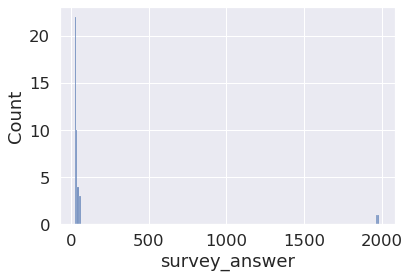

In [169]:
ages = qualitative_df[(qualitative_df.trial_type == "survey-text") & (qualitative_df.internal_node_id == "0.0-0.0")].survey_answer.astype(int)
sns.histplot(ages)

In [170]:
education = qualitative_df[(qualitative_df.trial_type == "survey-multi-choice") & (qualitative_df.survey_question_idx == 0)].survey_answer
education.value_counts()

Bachelor's degree    29
Some college          9
Master's degree       5
High school/GED       2
Name: survey_answer, dtype: int64

In [171]:
native = qualitative_df[(qualitative_df.trial_type == "survey-multi-choice") & (qualitative_df.survey_question_idx == 1)].survey_answer
native.value_counts()

Yes    45
Name: survey_answer, dtype: int64

### Comments

In [172]:
list(qualitative_df[(qualitative_df.trial_type == "survey-text") & (qualitative_df.internal_node_id != "0.0-0.0")].survey_answer)

['',
 'good',
 'no',
 '',
 '',
 '',
 '',
 '',
 'good',
 '',
 '',
 '',
 '',
 'none',
 'nice',
 'INTERESITNG SURVEY FOR ENGLISH SPEAKERS ',
 '',
 '',
 '',
 '',
 '',
 'VERY INTERESTING',
 'VERY INTERSTING THIS HIT ',
 'i would like to work on this experiment',
 '',
 'This was fun, thanks!',
 'the study was good',
 '',
 'NO',
 '',
 'Nothing',
 '',
 'good',
 'NONE',
 'nice survey',
 'Fun survey! ',
 'GREAT SURVEY',
 'The study was good',
 'n/a',
 'n/a',
 '',
 'n/a',
 'no',
 'Thanks.',
 'N/A']

### Total times

Text(0.5, 1.0, 'Total study time (minutes)')

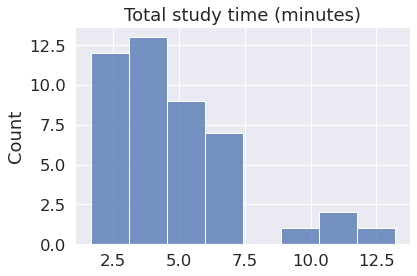

In [173]:
sns.histplot(pd.concat([response_df, qualitative_df]).groupby("uniqueid").apply(lambda rows: rows.rt.sum() / 1000 / 60))
plt.title("Total study time (minutes)")

In [174]:
pd.concat([response_df, qualitative_df]).groupby("uniqueid").rt.sum().apply(lambda xs: xs / 1000 / 60).agg(["mean", "std"])

mean    4.705224
std     2.565647
Name: rt, dtype: float64

### Response times

In [175]:
# sns.displot(data=response_df, x="rt", hue="uniqueid", kind="hist")

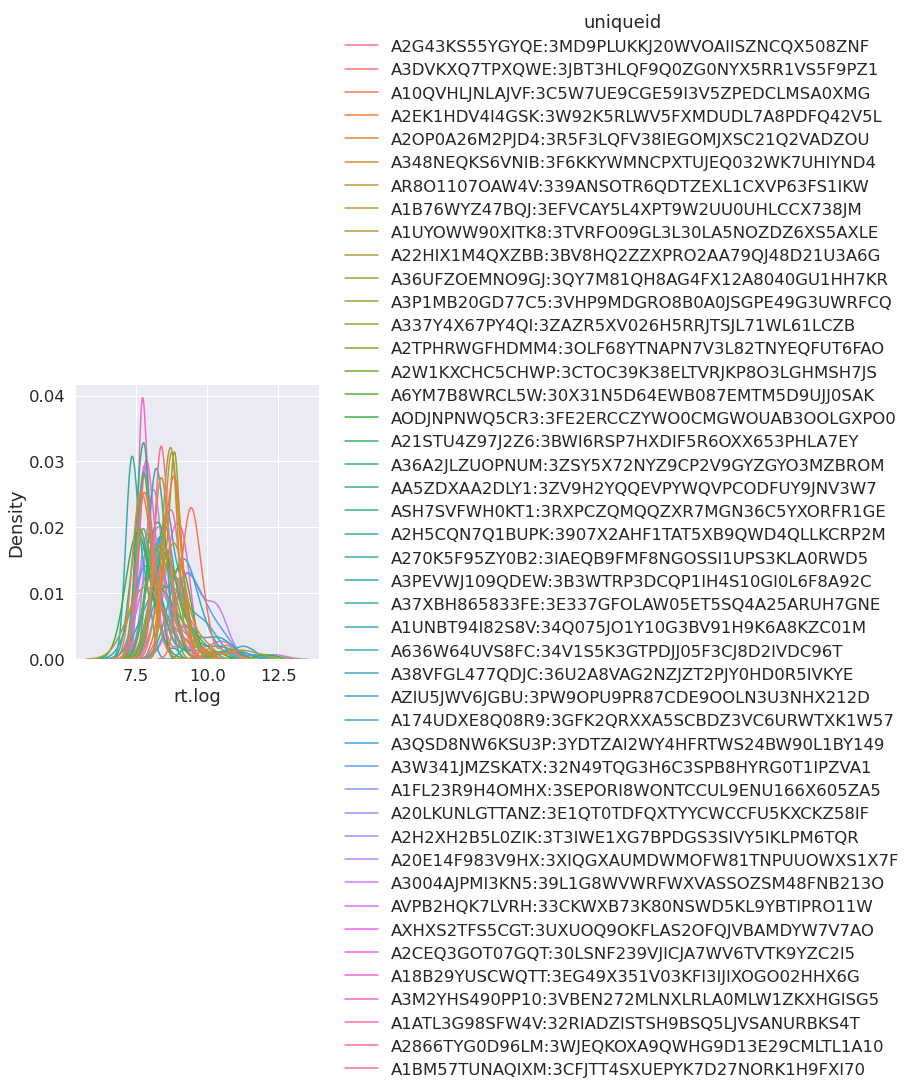

In [176]:
response_df["rt.log"] = np.log(response_df.rt)
sns.displot(data=response_df, x="rt.log", hue="uniqueid", kind="kde")

In [177]:
# sns.lmplot(data=response_df.reset_index(), x="trial_index", y="rt.log", hue="uniqueid", height=10, ci=False)
# plt.title("Log response time vs. trial position")

### How are people using the sliders?

- Stripplot points correspond to individual slider responses.
- Responses are grouped vertically by subject.
- Transparent boxplots indicate filler response value for a particular subject. Red median lines / boxes indicate "full" fillers and blue indicate "empty."
- X marks indicate mean practice response value for a particular subject. Red and blue match above.

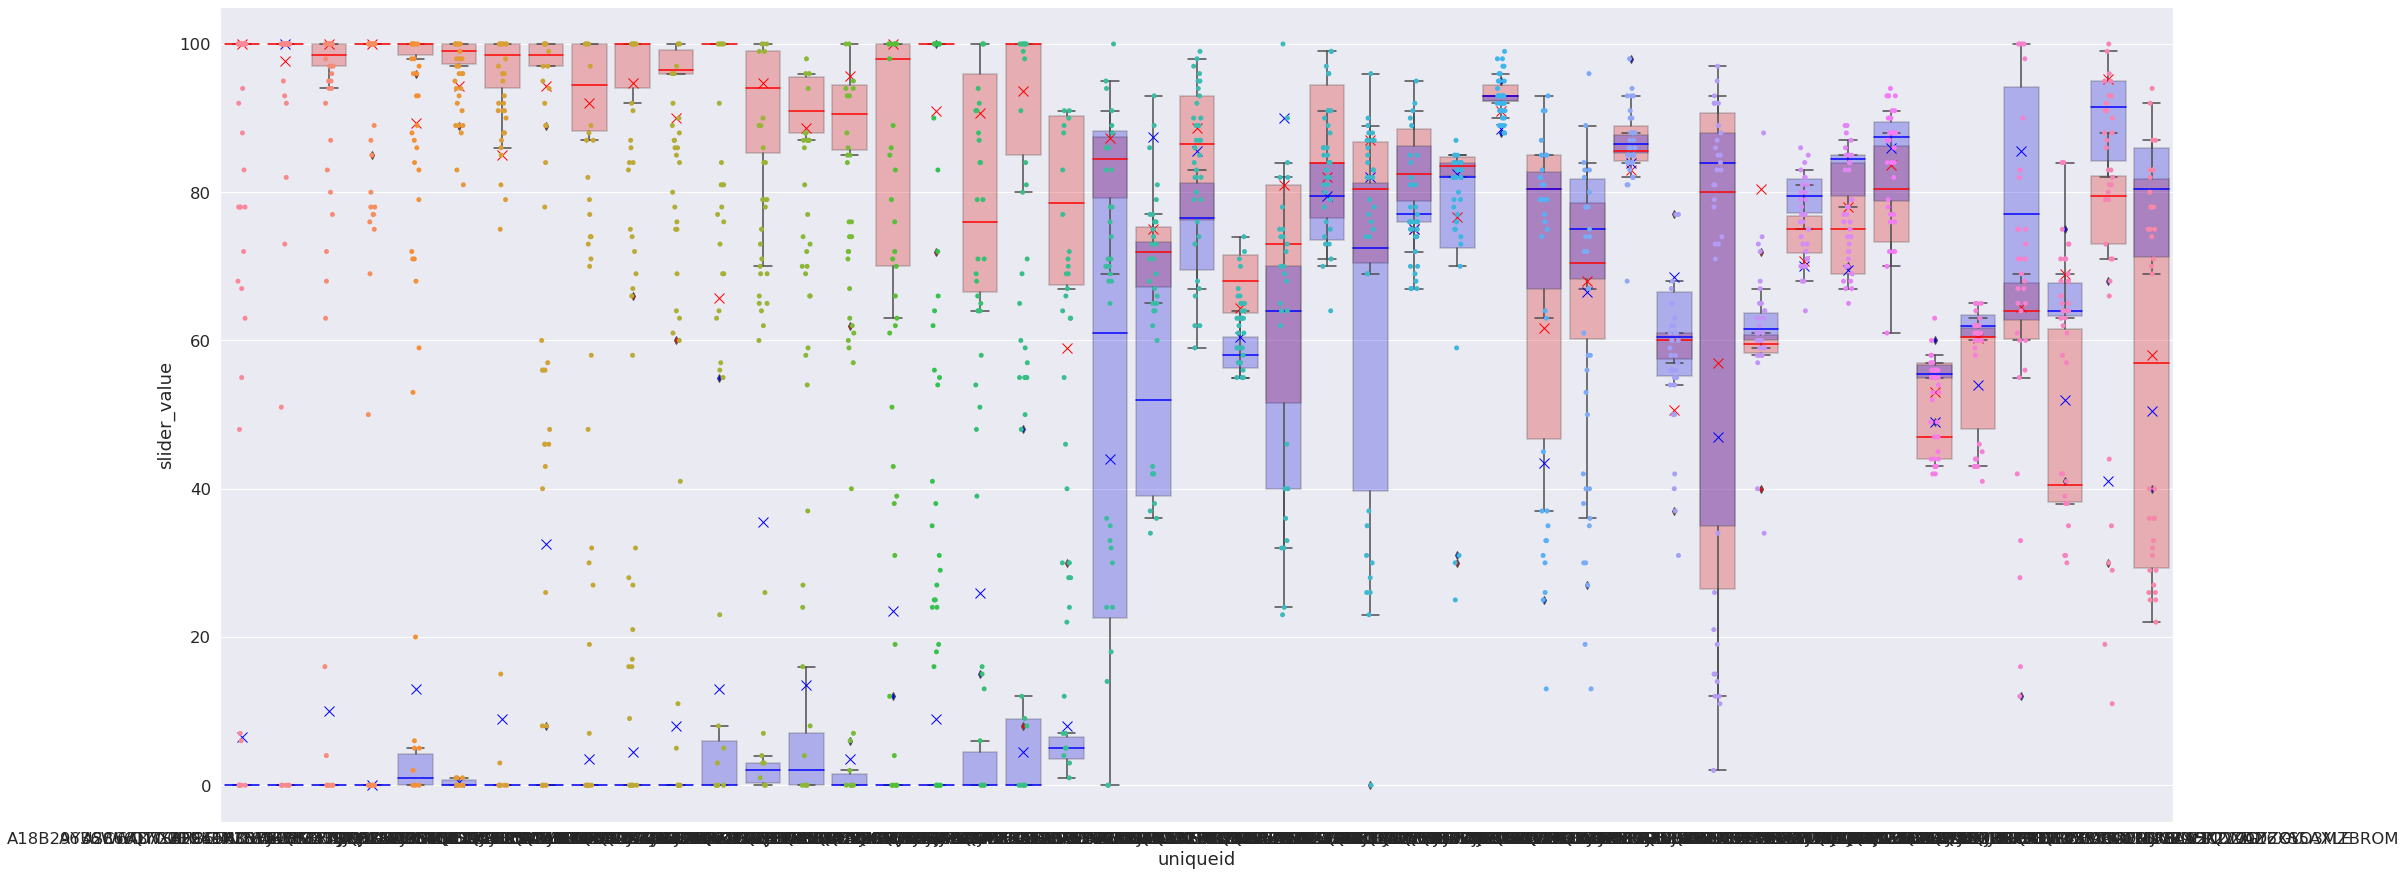

In [178]:
# Order S by descending difference between mean full-filler and empty-filler rating
filler_rows = response_df[response_df.condition_0 == "filler"]
filler_diffs = filler_rows.groupby("uniqueid").apply(lambda xs: xs[xs.condition_1 == "full"].slider_value.mean() - xs[xs.condition_1 == "empty"].slider_value.mean())
subject_order = filler_diffs.sort_values(ascending=False).index

plt.subplots(figsize=(35, 15))
g = sns.stripplot(data=response_df.reset_index(), x="uniqueid", y="slider_value", order=subject_order)

# plot filler responses
sns.boxplot(data=response_df[(response_df.condition_0 == "filler") & (response_df.condition_1 == "full")].reset_index(),
            x="uniqueid", y="slider_value", order=subject_order,
            color="red", medianprops=dict(color="red"), flierprops=dict(markerfacecolor="red"), boxprops=dict(alpha=0.3))
sns.boxplot(data=response_df[(response_df.condition_0 == "filler") & (response_df.condition_1 == "empty")].reset_index(),
            x="uniqueid", y="slider_value", order=subject_order, 
            color="blue", medianprops=dict(color="blue"), flierprops=dict(markerfacecolor="blue"), boxprops=dict(alpha=0.3))

# plot practice responses
practice_full, practice_empty = [], []
for i, subj in enumerate(subject_order):
    subj_rows = response_df.xs(subj, level="uniqueid")
    subj_rows = subj_rows[(subj_rows.condition_0 == "practice")]
    practice_full.append(subj_rows[subj_rows.condition_2 == "full"].slider_value.mean())
    practice_empty.append(subj_rows[subj_rows.condition_2 == "empty"].slider_value.mean())
    
g.plot(np.arange(len(subject_order)), practice_full, marker="x", markersize=10, color="red", linestyle="none")
g.plot(np.arange(len(subject_order)), practice_empty, marker="x", markersize=10, color="blue", linestyle="none")

## Attention checks

### Practice round

In [179]:
practice_df = response_df[response_df.condition_0 == "practice"]
practice_df["match"] = practice_df.apply(lambda r: r.slider_value > 50 if r.condition_2 == "full" else r.slider_value <= 50, axis=1)
practice_df["practice_id"] = practice_df.condition_1.str.cat(practice_df.condition_2)

/tmp/ipykernel_57/3679604798.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  practice_df["match"] = practice_df.apply(lambda r: r.slider_value > 50 if r.condition_2 == "full" else r.slider_value <= 50, axis=1)
/tmp/ipykernel_57/3679604798.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  practice_df["practice_id"] = practice_df.condition_1.str.cat(practice_df.condition_2)


In [180]:
# Ignore evaluating practice items which retrospectively don't seem like good practice items...
PRACTICE_IGNORE = {"solidempty", "abstractempty"}

practice_df = practice_df[~practice_df.practice_id.isin(PRACTICE_IGNORE)]

#### Practice failures by item

In [181]:
practice_df.groupby("practice_id").match.mean()

practice_id
abstractfull    0.977778
liquidfull      0.888889
solidfull       0.888889
Name: match, dtype: float64

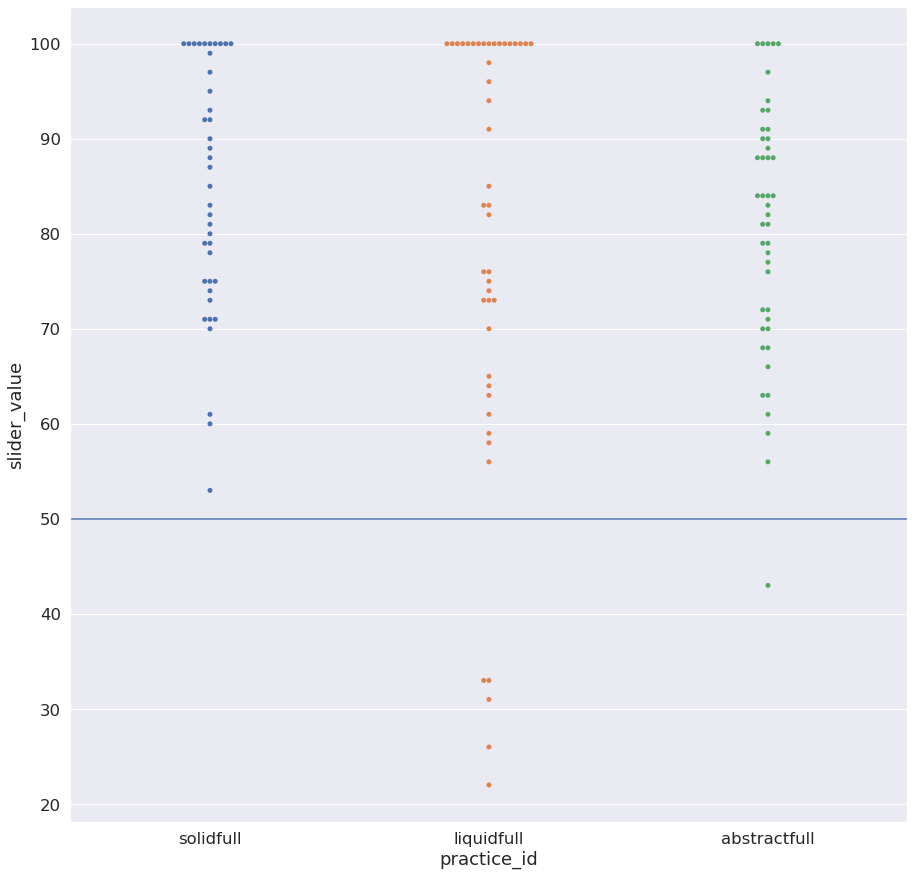

In [182]:
plt.subplots(figsize=(15,15))
sns.swarmplot(data=practice_df.reset_index(), x="practice_id", y="slider_value")
plt.axhline(50)

#### Practice copouts

In [183]:
practice_df.groupby("practice_id").slider_copout.agg(["mean", "count"]).sort_values("mean", ascending=False)

,mean,count
practice_id,,
solidfull,0.111111,45
abstractfull,0.000000,45
liquidfull,0.000000,45


### Fillers

<AxesSubplot:xlabel='t'>

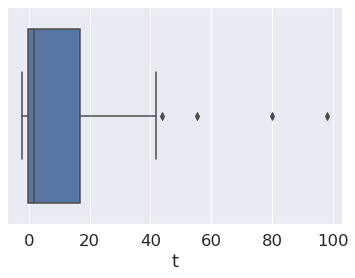

In [184]:
from scipy.stats import ttest_ind
def compute_filler_ttest(subj_rows):
    """
    sanity check: "full" items should be rated higher than "empty" filler items
    """
    filler_rows = subj_rows[subj_rows.condition_0 == "filler"]
    
    # Filter out copouts (and print warning -- fillers should not trigger copout)
    copout_rows = filler_rows[filler_rows.slider_copout]
    if len(copout_rows) > 0:
        print(f"WARNING: subject {filler_rows.iloc[0].name} had {len(copout_rows)} filler copout(s). Seems fishy.")
    filler_rows = filler_rows[~filler_rows.slider_copout]
    
    full_filler = filler_rows[filler_rows.condition_1 == "full"]
    empty_filler = filler_rows[filler_rows.condition_1 == "empty"]
    
    return pd.Series(ttest_ind(full_filler.slider_value, empty_filler.slider_value),
                     index=["t", "pval"])

filler_stats = response_df.groupby("uniqueid").apply(compute_filler_ttest)
sns.boxplot(data=filler_stats.reset_index(), x="t", hue="uniqueid")

In [185]:
filler_stats.sort_values("t").head(50)

,t,pval
uniqueid,,
AODJNPNWQ5CR3:3FE2ERCCZYWO0CMGWOUAB3OOLGXPO0,-2.127527,5.926761e-02
A3PEVWJ109QDEW:3B3WTRP3DCQP1IH4S10GI0L6F8A92C,-1.705606,1.188939e-01
ASH7SVFWH0KT1:3RXPCZQMQQZXR7MGN36C5YXORFR1GE,-1.661811,1.309162e-01
A1UYOWW90XITK8:3TVRFO09GL3L30LA5NOZDZ6XS5AXLE,-1.644068,1.311895e-01
A36A2JLZUOPNUM:3ZSY5X72NYZ9CP2V9GYZGYO3MZBROM,-1.330296,2.129609e-01
A2OP0A26M2PJD4:3R5F3LQFV38IEGOMJXSC21Q2VADZOU,-1.198379,2.583988e-01
AVPB2HQK7LVRH:33CKWXB73K80NSWD5KL9YBTIPRO11W,-1.106741,2.943179e-01
AXHXS2TFS5CGT:3UXUOQ9OKFLAS2OFQJVBAMDYW7V7AO,-0.997439,3.420747e-01
A2W1KXCHC5CHWP:3CTOC39K38ELTVRJKP8O3LGHMSH7JS,-0.871688,4.038214e-01


#### Filler copouts

In [186]:
response_df[response_df.condition_0 == "filler"].groupby(["item_id", "condition_1"]).slider_copout.agg(["mean", "sum", "count"]).sort_values("mean", ascending=False)

,,mean,sum,count
item_id,condition_1,,,
7.0,full,0.044444,2,45
3.0,empty,0.022222,1,45
9.0,full,0.022222,1,45
0.0,empty,0.000000,0,45
1.0,empty,0.000000,0,45
2.0,empty,0.000000,0,45
4.0,empty,0.000000,0,45
5.0,empty,0.000000,0,45
6.0,full,0.000000,0,45


#### Filler failures by item

In [187]:
filler_df = response_df[response_df.condition_0 == "filler"]
filler_df["match"] = filler_df.apply(lambda r: r.slider_value > 50 if r.condition_1 == "full" else r.slider_value <= 50, axis=1)

/tmp/ipykernel_57/2652486730.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filler_df["match"] = filler_df.apply(lambda r: r.slider_value > 50 if r.condition_1 == "full" else r.slider_value <= 50, axis=1)


In [188]:
filler_df.groupby(["condition_1", "item_id"]).match.mean()

condition_1  item_id
empty        0.0        0.555556
             1.0        0.488889
             2.0        0.533333
             3.0        0.466667
             4.0        0.466667
             5.0        0.533333
full         6.0        0.866667
             7.0        0.777778
             8.0        0.911111
             9.0        0.911111
             10.0       0.955556
             11.0       0.933333
Name: match, dtype: float64

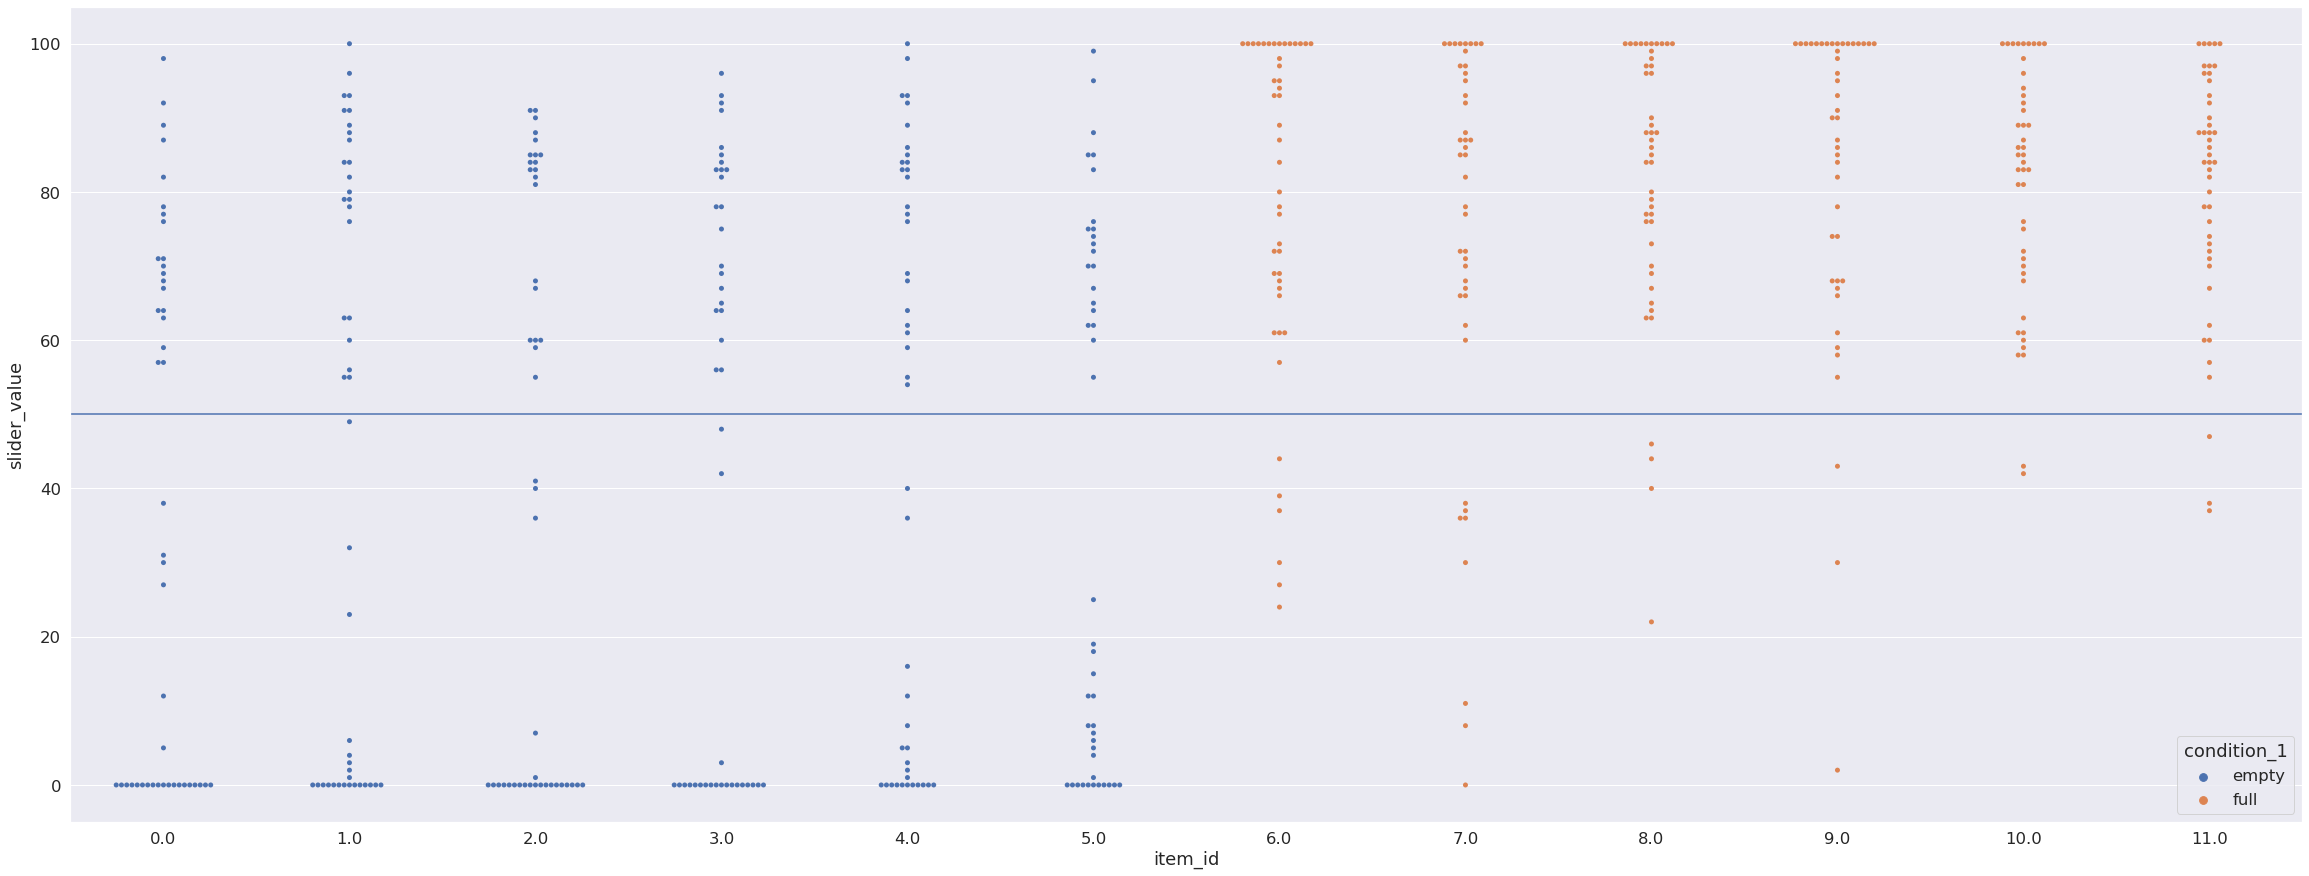

In [189]:
plt.subplots(figsize=(40,15))
# sns.barplot(data=filler_df.reset_index(), x="condition_1", hue="item_id", y="slider_value")
sns.swarmplot(data=filler_df.reset_index(), hue="condition_1", x="item_id", y="slider_value")
plt.axhline(50)

## Final data processing

In [190]:
exp_items = response_df[~(response_df.condition_0.isin(("practice", "filler")))]

### Filter based on practice and attention checks

In [191]:
practice_drops = set(practice_df.groupby("uniqueid").filter(lambda r: r.match.mean() < 0.66).index.get_level_values("uniqueid"))
drop_pct = np.round(len(practice_drops) / N * 100, 1)
print(f"{len(practice_drops)} subjects ({drop_pct}%) disqualified and dropped due to failed practice.")
print("\t" + "\n\t".join(practice_drops))
exp_items = exp_items.drop(practice_drops, level="uniqueid")

attention_drops = filler_stats[(filler_stats.t < 0) | (filler_stats.pval > 1e-1) | filler_stats.t.isna()]
drop_pct = np.round(len(attention_drops) / N * 100, 1)
print(f"{len(attention_drops)} subjects ({drop_pct}%, possibly overlapping with previous) disqualified and dropped due to failed attention checks.")
print("\t" + "\n\t".join(attention_drops.index))
exp_items = exp_items.drop(attention_drops.index, level="uniqueid")

1 subjects (2.2%) disqualified and dropped due to failed practice.
	A2H5CQN7Q1BUPK:3907X2AHF1TAT5XB9QWD4QLLKCRP2M
24 subjects (53.3%, possibly overlapping with previous) disqualified and dropped due to failed attention checks.
	A174UDXE8Q08R9:3GFK2QRXXA5SCBDZ3VC6URWTXK1W57
	A1FL23R9H4OMHX:3SEPORI8WONTCCUL9ENU166X605ZA5
	A1UYOWW90XITK8:3TVRFO09GL3L30LA5NOZDZ6XS5AXLE
	A20LKUNLGTTANZ:3E1QT0TDFQXTYYCWCCFU5KXCKZ58IF
	A270K5F95ZY0B2:3IAEQB9FMF8NGOSSI1UPS3KLA0RWD5
	A2CEQ3GOT07GQT:30LSNF239VJICJA7WV6TVTK9YZC2I5
	A2H2XH2B5L0ZIK:3T3IWE1XG7BPDGS3SIVY5IKLPM6TQR
	A2H5CQN7Q1BUPK:3907X2AHF1TAT5XB9QWD4QLLKCRP2M
	A2OP0A26M2PJD4:3R5F3LQFV38IEGOMJXSC21Q2VADZOU
	A2W1KXCHC5CHWP:3CTOC39K38ELTVRJKP8O3LGHMSH7JS
	A3004AJPMI3KN5:39L1G8WVWRFWXVASSOZSM48FNB213O
	A36A2JLZUOPNUM:3ZSY5X72NYZ9CP2V9GYZGYO3MZBROM
	A38VFGL477QDJC:36U2A8VAG2NZJZT2PJY0HD0R5IVKYE
	A3DVKXQ7TPXQWE:3JBT3HLQF9Q0ZG0NYX5RR1VS5F9PZ1
	A3M2YHS490PP10:3VBEN272MLNXLRLA0MLW1ZKXHGISG5
	A3P1MB20GD77C5:3VHP9MDGRO8B0A0JSGPE49G3UWRFCQ
	A3PEVWJ109QDEW:3B3WT

In [192]:
print(f"{len(set(exp_items.index.get_level_values('uniqueid')))} subjects remaining.")

21 subjects remaining.


### Merge in materials

In [193]:
import json
def load_materials(mat):
    with open(f"../../materials/{mat}.json") as f:
        materials = json.load(f)
    return pd.DataFrame.from_records(materials["items"]).rename(columns={"id": "item_id"}).set_index("item_id")

materials_ids = sorted(set(exp_items.materials_id))
materials_df = pd.concat([load_materials(mat) for mat in materials_ids], names=["materials_id"], keys=materials_ids, axis=0)

materials_df["AV"] = materials_df.A.str.cat(materials_df.V, " ")

# NB this doesn't handle fillers correctly

In [194]:
keep_cols = ["A", "V", "L", "AV", "A concrete?", "A countable?", "A animate?"]
merged_df = pd.merge(exp_items, materials_df[keep_cols], left_on=["materials_id", "item_id"], right_index=True)

### Filter out items which were dropped in later materials iterations

In [195]:
# Partition results into those evaluated on latest materials vs. earlier
latest_materials = materials_ids[-1]
latest_merged_df = merged_df[merged_df.materials_id == latest_materials]
earlier_merged_df = merged_df[merged_df.materials_id != latest_materials]

# Get item IDs which appear only in earlier
early_only = set(earlier_merged_df.item_id) - set(latest_merged_df.item_id)

print(f"Dropping {len(early_only)} item results because they weren't included in the latest materials, {materials_ids[-1]}.")
merged_df = merged_df[~merged_df.item_id.isin(early_only)]

Dropping 0 item results because they weren't included in the latest materials, swarm-006-nonalternating-natural.


### Separate control items from critical items

In [196]:
merged_df_critical = merged_df[~merged_df.is_nonalternating_control]
merged_df_control = merged_df[merged_df.is_nonalternating_control]

### Export

In [197]:
merged_df.to_csv("merged_df.csv")

## Basic visualization: construction meaning

In [198]:
# Compute by-item slider difference of means between conditions
def compute_item_difference(item_rows):
    item_rows = item_rows.set_index("agent_is_subject")
    
    if True not in item_rows.index or False not in item_rows.index:
        return np.nan
    
    agent_rows, location_rows = item_rows.loc[True], item_rows.loc[False]
    return location_rows.slider_value_normed.mean() - agent_rows.slider_value_normed.mean()

item_differences = merged_df_critical.groupby(["item_id", "A", "V", "L", "A concrete?", "A countable?", "A animate?"]) \
    .apply(compute_item_difference) \
    .rename("LocationSubject - AgentSubject")

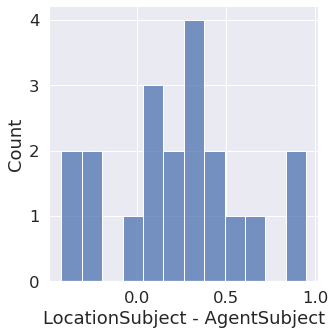

In [199]:
sns.displot(item_differences, bins=12)

In [200]:
item_differences.sort_values(ascending=False)

item_id  A             V        L             A concrete?  A countable?  A animate?
64.0     worms         wriggl   bucket        True         True          True          0.949110
17.0     debris        flow     river         True         False         False         0.866920
8.0      cockroaches   creep    cave          True         True          True          0.635528
2.0      ants          crawl    table         True         True          True          0.597394
3.0      trumpets      ring     concert hall  True         True          False         0.452275
22.0     lights        glow     sky           True         True          False         0.394045
19.0     bubbles       foam     tub           True         True          False         0.369107
56.0     tadpoles      swimm    pond          True         True          True          0.342706
6.0      terror        cours    body          False        False         False         0.312811
20.0     fireflies     glimmer  backyard      True  

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 'debris flow'),
  Text(1, 0, 'sewage runn'),
  Text(2, 0, 'frogs hopp'),
  Text(3, 0, 'excitement puls'),
  Text(4, 0, 'tadpoles swimm'),
  Text(5, 0, 'excitement crackl'),
  Text(6, 0, 'ants crawl'),
  Text(7, 0, 'people bustl'),
  Text(8, 0, 'cockroaches creep'),
  Text(9, 0, 'anticipation tingl'),
  Text(10, 0, 'fear prickl'),
  Text(11, 0, 'worms wriggl'),
  Text(12, 0, 'trumpets ring'),
  Text(13, 0, 'bubbles foam'),
  Text(14, 0, 'lights glow'),
  Text(15, 0, 'fireflies glimmer'),
  Text(16, 0, 'trepidation shak'),
  Text(17, 0, 'energy humm'),
  Text(18, 0, 'bees swarm'),
  Text(19, 0, 'terror cours')])

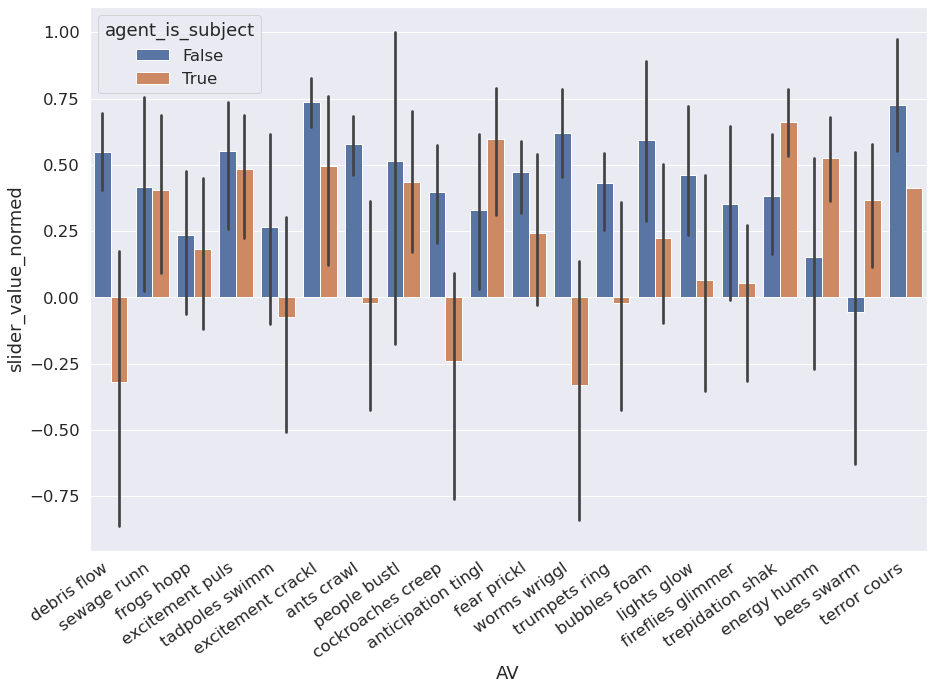

In [201]:
plt.subplots(figsize=(15, 10))
sns.barplot(data=merged_df_critical.reset_index(), x="AV", hue="agent_is_subject", y="slider_value_normed")
plt.xticks(rotation=35, ha="right")

<AxesSubplot:xlabel='A concrete?', ylabel='LocationSubject - AgentSubject'>

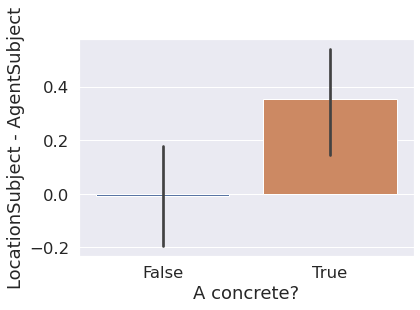

In [202]:
sns.barplot(data=item_differences.reset_index(), x="A concrete?", y="LocationSubject - AgentSubject")

<AxesSubplot:xlabel='A countable?', ylabel='LocationSubject - AgentSubject'>

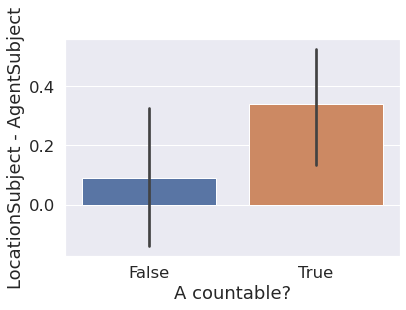

In [203]:
sns.barplot(data=item_differences.reset_index(), x="A countable?", y="LocationSubject - AgentSubject")

<AxesSubplot:xlabel='A animate?', ylabel='LocationSubject - AgentSubject'>

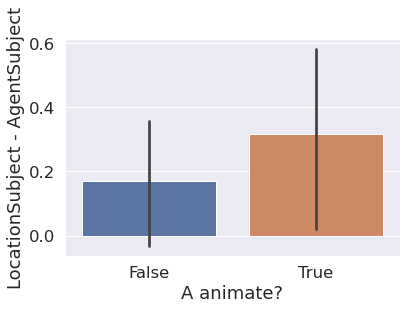

In [204]:
sns.barplot(data=item_differences.reset_index(), x="A animate?", y="LocationSubject - AgentSubject")

### Copouts

In [205]:
copouts = merged_df.groupby(["materials_id", "item_id"]).apply(lambda subj_rows: subj_rows.slider_copout.astype(bool).mean())

In [206]:
copouts = merged_df.groupby(["materials_id", "item_id", "agent_is_given", "agent_is_subject", "is_nonalternating_control"] + keep_cols) \
    .apply(lambda rows: rows.slider_copout.astype(bool).agg(["sum", "count"]))
copouts = copouts.groupby(["item_id", "agent_is_given", "agent_is_subject", "is_nonalternating_control"]).sum()
copouts["mean"] = copouts["sum"].div(copouts["count"])
copouts.sort_values("mean", ascending=False)

slider_copout                                                      sum  count  \
item_id agent_is_given agent_is_subject is_nonalternating_control               
4.0     False          False            False                        1      2   
6.0     False          True             False                        1      2   
31.0    False          False            False                        1      2   
30.0    True           True             False                        2      4   
6.0     True           False            False                        1      3   
...                                                                ...    ...   
17.0    False          False            False                        0      4   
8.0     True           True             False                        0      2   
        False          True             False                        0      1   
                       False            False                        0      5   
64.0    True           True             False                        0      3   

slider_copout                                                          mean  
item_id agent_is_given agent_is_subject is_nonalternating_control            
4.0     False          False            False                      0.500000  
6.0     False          True             False                      0.500000  
31.0    False          False            False                      0.500000  
30.0    True           True             False                      0.500000  
6.0     True           False            False                      0.333333  
...                                                                     ...  
17.0    False          False            False                      0.000000  
8.0     True           True             False                      0.000000  
        False          True             False                      0.000000  
                       False            False                      0.000000  
64.0    True           True             False                      0.000000  

[74 rows x 3 columns]

<AxesSubplot:xlabel='A', ylabel='slider_copout'>

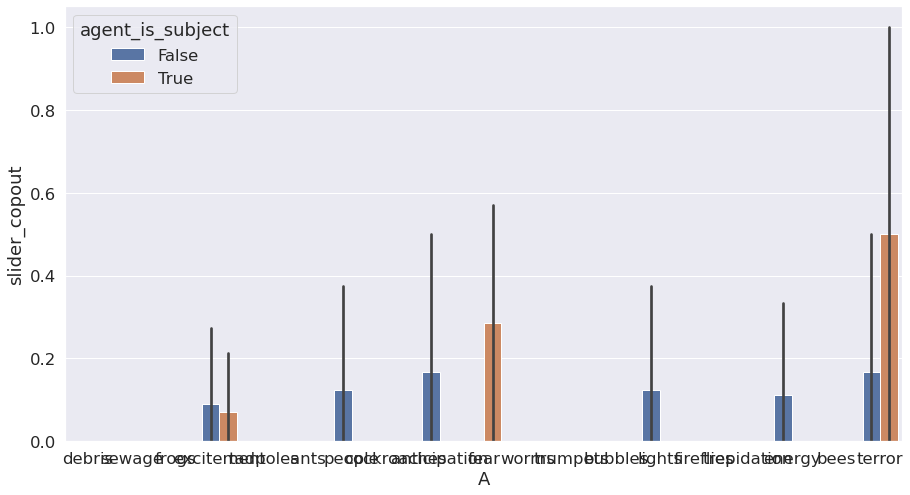

In [207]:
plt.subplots(figsize=(15, 8))
sns.barplot(data=merged_df_critical, x="A", y="slider_copout", hue="agent_is_subject")

<AxesSubplot:xlabel='A concrete?', ylabel='slider_copout'>

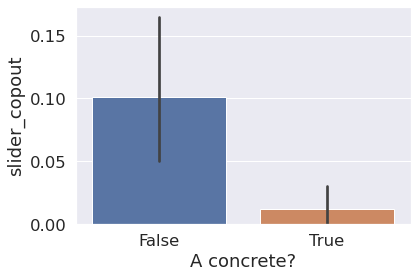

In [208]:
sns.barplot(data=merged_df_critical, x="A concrete?", y="slider_copout")

<AxesSubplot:xlabel='A countable?', ylabel='slider_copout'>

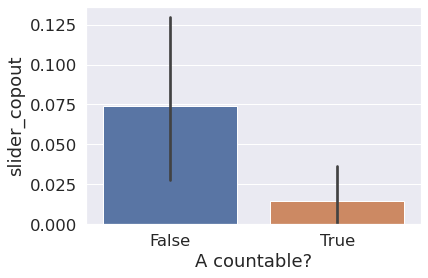

In [209]:
sns.barplot(data=merged_df_critical, x="A countable?", y="slider_copout")

## Item exposure

In [210]:
merged_df.groupby(["item_id", "A", "agent_is_given", "agent_is_subject", "is_nonalternating_control"]).size().sort_values().head(50)

item_id  A             agent_is_given  agent_is_subject  is_nonalternating_control
0.0      bees          True            False             False                        1
58.0     anticipation  True            False             False                        1
                       False           True              False                        1
56.0     tadpoles      True            False             False                        1
19.0     bubbles       True            False             False                        1
8.0      cockroaches   False           True              False                        1
0.0      bees          False           False             False                        2
8.0      cockroaches   True            True              False                        2
19.0     bubbles       False           True              False                        2
20.0     fireflies     True            False             False                        2
24.0     frogs         False         

## Basic visualization: givenness manipulation

In [211]:
# Compute by-item slider difference of means between conditions
def compute_item_difference(item_rows):
    item_rows = item_rows.set_index("agent_is_subject")
    
    if True not in item_rows.index or False not in item_rows.index:
        return np.nan
    
    agent_rows, location_rows = item_rows.loc[True], item_rows.loc[False]
    return location_rows.slider_value_normed.mean() - agent_rows.slider_value_normed.mean()

item_differences = merged_df_critical.groupby(["item_id", "A", "V", "L", "AV", "A concrete?", "A countable?", "agent_is_given"]) \
    .apply(compute_item_difference) \
    .rename("LocationSubject - AgentSubject")

In [212]:
item_differences.sort_values()

item_id  A             V        L             AV                  A concrete?  A countable?  agent_is_given
0.0      bees          swarm    garden        bees swarm          True         True          False            -0.669617
25.0     energy        humm     market        energy humm         False        False         True             -0.590259
58.0     anticipation  tingl    arms          anticipation tingl  False        False         True             -0.476658
41.0     trepidation   shak     chest         trepidation shak    False        False         True             -0.300357
58.0     anticipation  tingl    arms          anticipation tingl  False        False         False            -0.299244
31.0     excitement    puls     temples       excitement puls     False        False         True             -0.155304
4.0      people        bustl    square        people bustl        True         True          True             -0.127354
39.0     sewage        runn     street        sewage

<AxesSubplot:xlabel='agent_is_given', ylabel='LocationSubject - AgentSubject'>

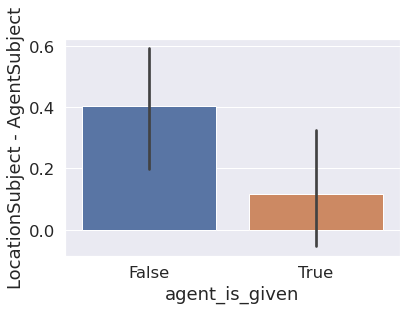

In [213]:
sns.barplot(data=item_differences.reset_index(), x="agent_is_given", y="LocationSubject - AgentSubject")

<AxesSubplot:xlabel='agent_is_subject', ylabel='slider_value_normed'>

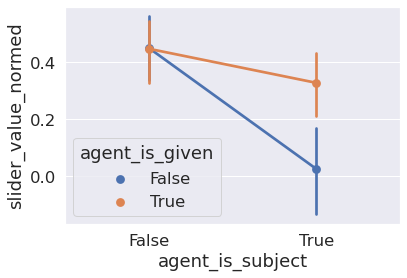

In [214]:
sns.pointplot(data=merged_df_critical.reset_index(), x="agent_is_subject", y="slider_value_normed", hue="agent_is_given")

<AxesSubplot:xlabel='Construction', ylabel='Normalized slider response'>

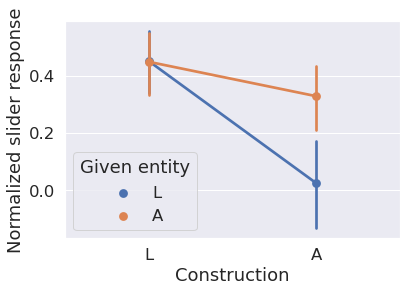

In [215]:
to_plot = merged_df_critical.copy()
to_plot["Construction"] = to_plot.agent_is_subject.map({False: "L", True: "A"})
to_plot["Given entity"] = to_plot.agent_is_given.map({False: "L", True: "A"})
to_plot["Normalized slider response"] = to_plot.slider_value_normed
sns.pointplot(data=to_plot.reset_index(), x="Construction", y="Normalized slider response", hue="Given entity")

<AxesSubplot:xlabel='agent_is_subject', ylabel='slider_value_normed'>

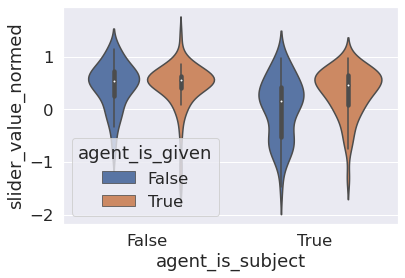

In [216]:
sns.violinplot(data=merged_df_critical.reset_index(), x="agent_is_subject", y="slider_value_normed", hue="agent_is_given")

In [217]:
merged_df_critical.groupby(["agent_is_subject", "agent_is_given"]).slider_value_normed.agg(["mean", "std"])

mean       std
agent_is_subject agent_is_given                    
False            False           0.450495  0.431992
                 True            0.447845  0.432420
True             False           0.025398  0.577756
                 True            0.328133  0.453308

In [218]:
merged_df_critical.groupby(["agent_is_subject", "agent_is_given"]).slider_value.agg(["mean", "std", "sem"])

mean        std       sem
agent_is_subject agent_is_given                                
False            False           78.049180  17.433135  2.232084
                 True            81.000000  17.294067  2.232654
True             False           61.055556  25.550850  3.477030
                 True            74.066667  20.318537  2.623112

### Split by concreteness

<AxesSubplot:xlabel='A concrete?', ylabel='LocationSubject - AgentSubject'>

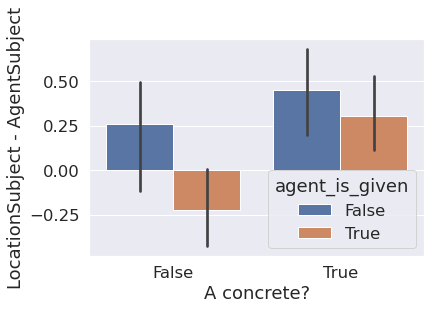

In [219]:
sns.barplot(data=item_differences.reset_index(), x="A concrete?", y="LocationSubject - AgentSubject", hue="agent_is_given")

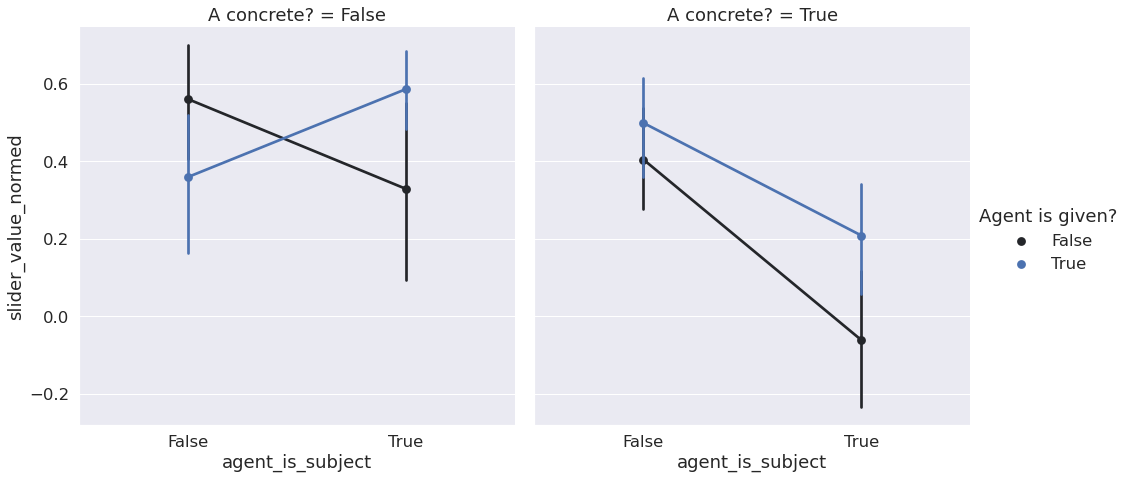

In [220]:
g = sns.FacetGrid(data=merged_df_critical.reset_index(), col="A concrete?", height=7)
g.map(sns.pointplot, "agent_is_subject", "slider_value_normed", "agent_is_given", order=[False, True], hue_order=[False, True]).add_legend(title="Agent is given?")

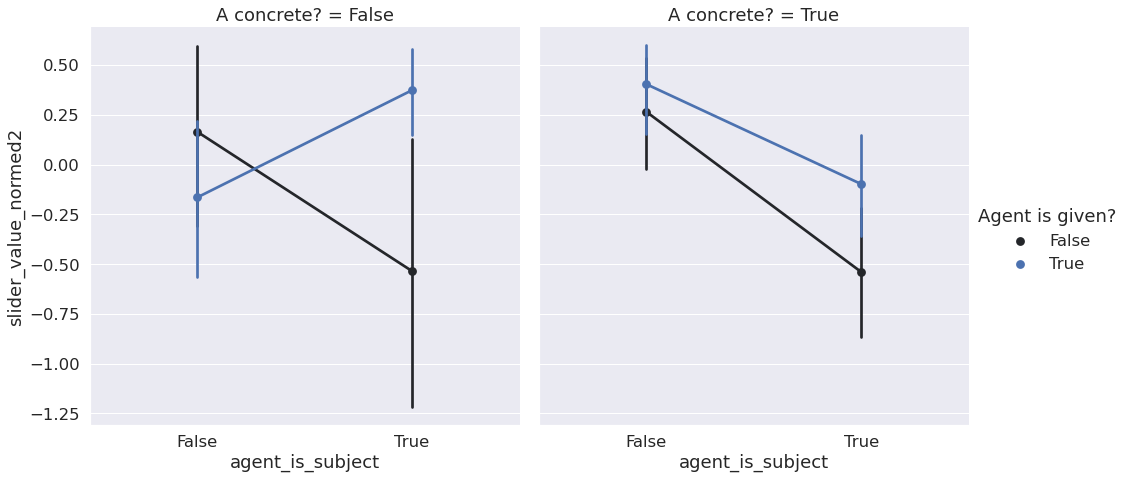

In [221]:
graphdf = merged_df_critical.copy()
graphdf["slider_value_normed2"] = graphdf.groupby('item_id').slider_value_normed.transform(lambda xs: (xs - xs.mean()) / xs.std())
g = sns.FacetGrid(data=graphdf.reset_index(), col="A concrete?", height=7)
g.map(sns.pointplot, "agent_is_subject", "slider_value_normed2", "agent_is_given", order=[False, True], hue_order=[False, True]).add_legend(title="Agent is given?")

In [222]:
merged_df_critical.groupby("A concrete?").apply(
    lambda rows: ttest_ind(rows[rows.agent_is_given & ~rows.agent_is_subject & ~rows.slider_copout].slider_value_normed,
                           rows[~rows.agent_is_given & ~rows.agent_is_subject & ~rows.slider_copout].slider_value_normed))

A concrete?
False    (-0.032512157728615834, 0.9741574857195798)
True       (2.1058362986657375, 0.03676024266421882)
dtype: object

In [223]:
merged_df_critical.groupby(["A concrete?", "agent_is_subject"]).apply(
    lambda rows: ttest_ind(rows[rows.agent_is_given & ~rows.slider_copout].slider_value_normed,
                           rows[~rows.agent_is_given & ~rows.slider_copout].slider_value_normed))

A concrete?  agent_is_subject
False        False               (-1.5601525579853643, 0.1270144352660319)
             True                 (2.1574582086480536, 0.0393908071228724)
True         False                (0.9600531016659577, 0.3399576836237964)
             True                 (2.280865293172284, 0.02518323774673111)
dtype: object

### Split by item

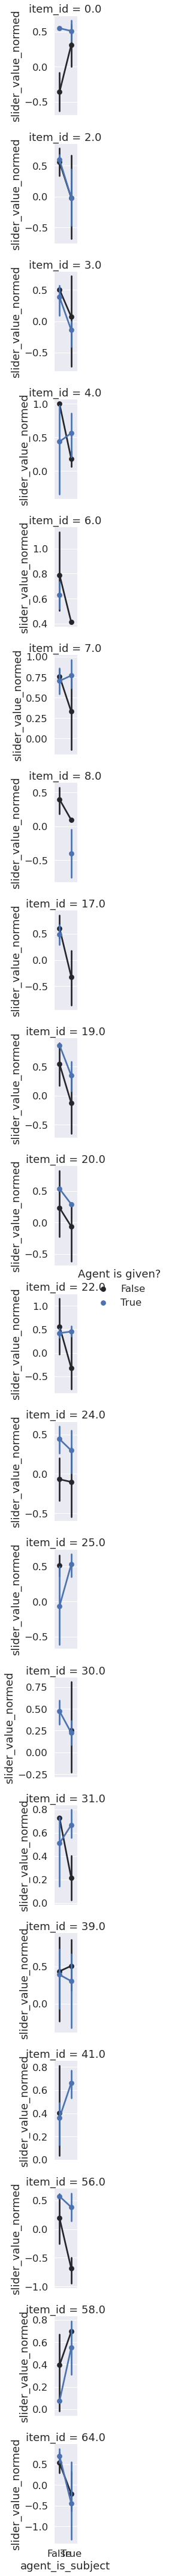

In [224]:
g = sns.FacetGrid(data=merged_df_critical.reset_index(), row="item_id", sharey=False)
g.map(sns.pointplot, "agent_is_subject", "slider_value_normed", "agent_is_given", order=[False, True], hue_order=[False, True])
g.add_legend(title="Agent is given?")
# sns.pointplot(data=merged_df.reset_index(), x="agent_is_subject", y="slider_value_normed", hue="agent_is_given")

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 'tadpoles swimm'),
  Text(1, 0, 'bubbles foam'),
  Text(2, 0, 'worms wriggl'),
  Text(3, 0, 'debris flow'),
  Text(4, 0, 'lights glow'),
  Text(5, 0, 'ants crawl'),
  Text(6, 0, 'fireflies glimmer'),
  Text(7, 0, 'frogs hopp'),
  Text(8, 0, 'excitement crackl'),
  Text(9, 0, 'trumpets ring'),
  Text(10, 0, 'excitement puls'),
  Text(11, 0, 'people bustl'),
  Text(12, 0, 'bees swarm'),
  Text(13, 0, 'fear prickl'),
  Text(14, 0, 'terror cours'),
  Text(15, 0, 'sewage runn'),
  Text(16, 0, 'anticipation tingl'),
  Text(17, 0, 'cockroaches creep'),
  Text(18, 0, 'energy humm'),
  Text(19, 0, 'trepidation shak')])

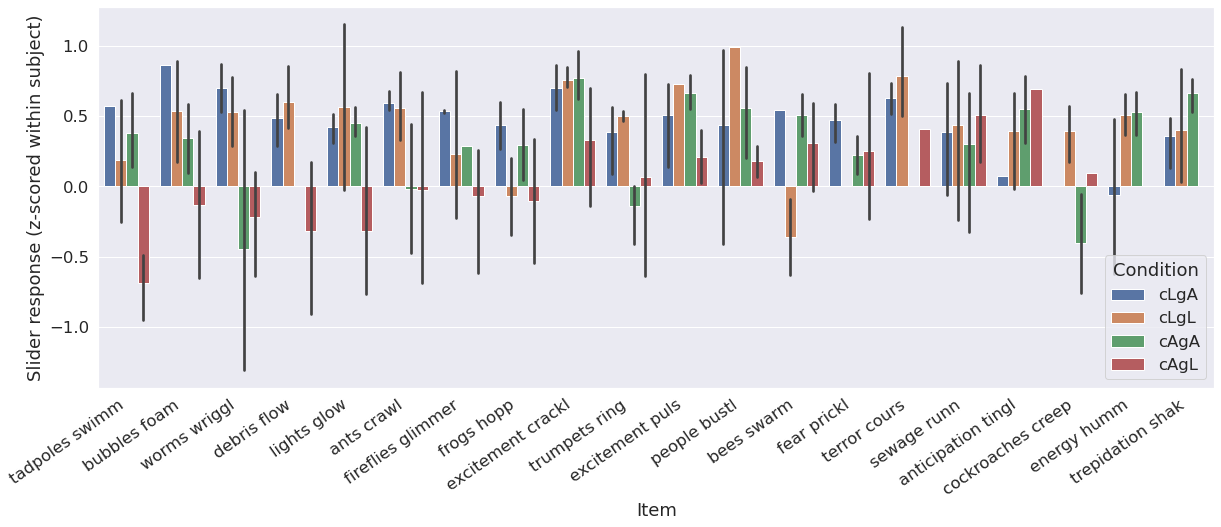

In [225]:
plt.subplots(figsize=(20, 7))
to_plot = merged_df_critical.copy()
to_plot["c"] = to_plot.agent_is_subject.map({False: "L", True: "A"})
to_plot["g"] = to_plot.agent_is_given.map({False: "L", True: "A"})
to_plot["Condition"] = "c" + to_plot.c.str.cat("g" + to_plot.g)

order = to_plot.groupby("AV").apply(lambda xs: xs[xs.Condition == "cLgA"].slider_value_normed.mean() - xs[xs.Condition == "cAgL"].slider_value_normed.mean()).sort_values(ascending=False).index

column_mappings = {
    "slider_value_normed": "Slider response (z-scored within subject)",
    "AV": "Item"
}

sns.barplot(data=to_plot.rename(columns=column_mappings),
            x=column_mappings["AV"], hue="Condition", y=column_mappings["slider_value_normed"], order=order, hue_order=["cLgA", "cLgL", "cAgA", "cAgL"])
plt.xticks(rotation=35, ha="right")

## Extras

In [226]:
pd.merge(response_df.xs("A1VX5ZKAT3S8YP:34PGFRQONPZ0JASKSXG0V1FX6U6JWX", level="uniqueid").reset_index()[["trial_index", "materials_id", "item_id", "condition_0", "condition_1", "agent_is_subject", "slider_value"]],
         materials_df[["A", "V", "L"]],
         left_on=["materials_id", "item_id"], right_index=True).sort_values("agent_is_subject")

KeyError: 'A1VX5ZKAT3S8YP:34PGFRQONPZ0JASKSXG0V1FX6U6JWX'

In [ ]:
exp_items[(exp_items.condition_0 != "filler") & (exp_items.item_id == 3)][["agent_is_subject", "slider_value_normed"]].sort_values(["agent_is_subject", "slider_value_normed"])